In [132]:
import os

import pandas as pd
import seaborn as sn
import torch
from IPython.core.display import display
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchmetrics import Accuracy
from torchvision import transforms
from torchvision.datasets import MNIST
from pytorch_lightning.callbacks import Timer


/var/folders/37/0z429fns1zn9kk76rqc9qhfrcw3wh9/T/ipykernel_40232/2266202346.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [133]:
from src.model import LitMNIST

In [134]:
model = LitMNIST(resolution='high',num_classes=3,batch_size=128)
timer = Timer(duration="00:12:00:00")

trainer = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=3,
    callbacks=[TQDMProgressBar(refresh_rate=20),timer],
    logger=CSVLogger(save_dir="logs/"),
)
trainer.fit(model)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name          | Type       | Params
---------------------------------------------
0 | model         | Sequential | 54.6 K
1 | val_accuracy  | Accuracy   | 0     
2 | test_accuracy | Accuracy   | 0     
---------------------------------------------
54.6 K    Trainable params
0         Non-trainable params
54.6 K    Total params
0.218     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/Users/hzhang747/opt/anaconda3/envs/dl2021/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/hzhang747/opt/anaconda3/envs/dl2021/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [130]:
test_results = trainer.test()


Restoring states from the checkpoint path at logs/default/version_13/checkpoints/epoch=2-step=698.ckpt
Loaded model weights from checkpoint at logs/default/version_13/checkpoints/epoch=2-step=698.ckpt


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': 0.9888783097267151, 'test_loss': 0.047444384545087814}
--------------------------------------------------------------------------------


In [131]:
test_results

[{'test_loss': 0.047444384545087814, 'test_acc': 0.9888783097267151}]

In [13]:
import matplotlib.pyplot as plt

In [23]:
train_ds.__getitem__(100)[0].numpy().shape

(1, 12, 12)

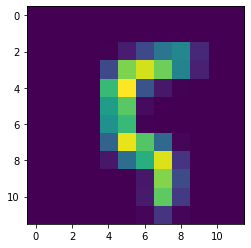

In [24]:
plt.imshow(train_ds.__getitem__(100)[0].numpy().squeeze())